# Classification using the MNIST database
This database contains 70000 hand written numbers and lables for each.


load database

In [135]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [136]:
X, y = mnist['data'], mnist['target']
X.shape


(70000, 784)

## review a small portion of the data to understand what is contained in it.
There are 70,000 rows each with 784 features. The 784 features are the 28x28 pixel array of the hand written image

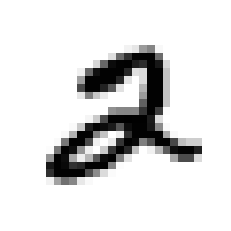

In [137]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

some_digit = X[5]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [138]:
y = y.astype(np.uint8)

## try getting ride of some of the grey bits.

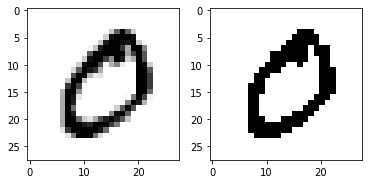

In [199]:
for i in range(1,2):
    some_digits = X[i]
    some_digit_image = some_digits.reshape(28,28)
    #some_digit_amp = some_digit_image > 100
    some_digit_amp = np.where(some_digit_image > 100, 100, 0)

    #plt.imshow(some_digit_image, cmap='binary')
    #plt.imshow(some_digit_amp, cmap='binary')
    #plt.axis('off')
    #plt.show()
   
    
    plt.figure()
    plt.subplot(121)
    plt.imshow(some_digit_image, cmap='binary')

    plt.subplot(122)
    plt.imshow(some_digit_amp, cmap='Greys' )
    plt.show()

## split out the training data from the test data
first 60000 images for training last 10000 for test

In [198]:
 some_digit_amp
    

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 100, 100, 100,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 100, 100, 100, 100, 100,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [140]:
X_train, Xtest, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [141]:
X_train, X_test, y_train, y_test = X[:20000], X[20000:22000], y[:20000], y[20000:22000]


# Train a Support Vector model

In [142]:
from sklearn.svm import SVC 
svm_clf = SVC(gamma='scale')
svm_clf_bw = SVC(gamma='scale')


In [143]:
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [144]:
svm_clf.predict([some_digit])


array([2], dtype=uint8)

In [145]:
some_digit_scores = svm_clf.decision_function([some_digit])

In [146]:
some_digit_scores

array([[ 2.90545511, -0.29330802,  9.5       ,  7.07066312,  4.89084079,
         3.92827687,  0.82796866,  1.9146687 ,  8.15267424,  6.10276053]])

------- 20 -------


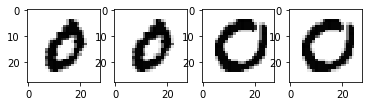

------- 40 -------


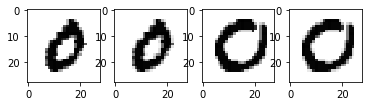

------- 60 -------


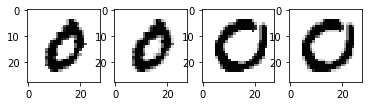

------- 80 -------


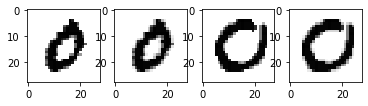

------- 100 -------


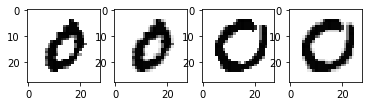

------- 120 -------


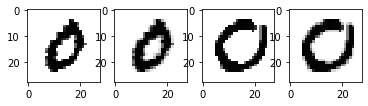

------- 140 -------


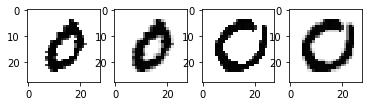

------- 160 -------


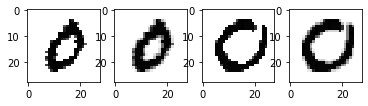

------- 180 -------


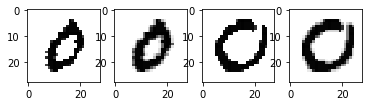

In [147]:
import numpy as np

thresh = 100

for thresh in range(20,200, 20):
    X_train_bw = np.where(X_train > thresh, X_train, 0)
    X_test_bw = np.where(X_test > thresh, X_test, 0)
    
    print('-------', thresh, '-------')

    #plt.imshow(X_train_bw[5].reshape(28,28), cmap='binary')
    plt.figure()
    plt.subplot(141)
    plt.imshow(X_train_bw[37].reshape(28,28), cmap='binary')

    plt.subplot(142)
    plt.imshow(X_train[37].reshape(28,28), cmap='binary')
    
    plt.subplot(143)
    plt.imshow(X_train_bw[121].reshape(28,28), cmap='binary')

    plt.subplot(144)
    plt.imshow(X_train[121].reshape(28,28), cmap='binary')
    plt.show()



In [148]:
thresh = 180
X_train_bw = np.where(X_train > thresh, X_train, 0)
X_test_bw = np.where(X_test > thresh, X_test, 0)
svm_clf_bw.fit(X_train_bw, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [149]:
svm_clf_bw.predict([X_train_bw[7]])

array([3], dtype=uint8)

In [150]:
some_digit_scores_bw = svm_clf_bw.decision_function([X_train_bw[7]])
some_digit_scores_bw

array([[ 3.91097375,  1.77553125,  6.09447731,  9.5       ,  1.79359914,
         5.02391414, -0.33058766,  1.81621382,  8.29441356,  7.12146469]])

In [151]:
svm_clf.decision_function([X_train[7]])

array([[ 3.90428446,  1.8166931 ,  7.10838877,  9.5       ,  0.76383048,
         5.02688853, -0.31028313,  2.82593173,  8.26191621,  6.10234986]])

# Look at the Error analysis for the two different flows
using cross validation, confusion matrix, ROC and AOC


In [152]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)
y_train_pred_bw = cross_val_predict(svm_clf_bw, X_train_bw, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx_bw = confusion_matrix(y_train, y_train_pred_bw)


In [153]:
conf_mx

array([[1975,    0,    4,    0,    4,    1,    5,    1,    2,    2],
       [   0, 2253,    9,    7,    2,    2,    0,    1,    5,    2],
       [  11,    8, 1854,    9,   10,    2,    4,   15,   14,    2],
       [   4,   10,   25, 1958,    1,   27,    3,   16,   23,    9],
       [   2,    6,    8,    0, 1889,    0,   10,    3,    0,   27],
       [   4,    2,    4,   23,    2, 1711,   13,    0,   13,    3],
       [  12,    5,    3,    1,    7,   11, 1930,    0,    2,    0],
       [   1,    4,   13,    2,   13,    0,    0, 2025,    7,   28],
       [   2,   15,   13,   22,   11,   17,   11,    3, 1816,   12],
       [   6,    5,    2,   17,   32,    5,    1,   23,   10, 1913]])

In [154]:
conf_mx_bw

array([[1960,    0,    6,    1,    4,    9,   11,    1,    2,    0],
       [   0, 2248,    9,    7,    4,    6,    1,    0,    4,    2],
       [  13,   16, 1813,   12,   13,    5,    9,   23,   22,    3],
       [   4,   11,   31, 1918,    3,   43,    3,   20,   31,   12],
       [   1,    7,    7,    2, 1864,    1,   15,    4,    1,   43],
       [   8,    9,    6,   29,    5, 1677,   15,    0,   17,    9],
       [  11,    5,    4,    1,   15,   12, 1921,    0,    2,    0],
       [   2,    8,   20,    1,   17,    4,    0, 2001,    6,   34],
       [   4,   18,   15,   34,   14,   30,   13,    6, 1770,   18],
       [   7,    7,    3,   22,   42,    5,    1,   31,   15, 1881]])

In [155]:
cl_a, cl_b = 3, 5
x_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
x_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
x_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
x_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]

x_aa_bw = X_train[(y_train == cl_a) & (y_train_pred_bw == cl_a)]
x_ab_bw = X_train[(y_train == cl_a) & (y_train_pred_bw == cl_b)]
x_bb_bw = X_train[(y_train == cl_b) & (y_train_pred_bw == cl_b)]
x_ba_bw = X_train[(y_train == cl_b) & (y_train_pred_bw == cl_a)]

## compare correctly predicted numbers on the left to incorrect on the right

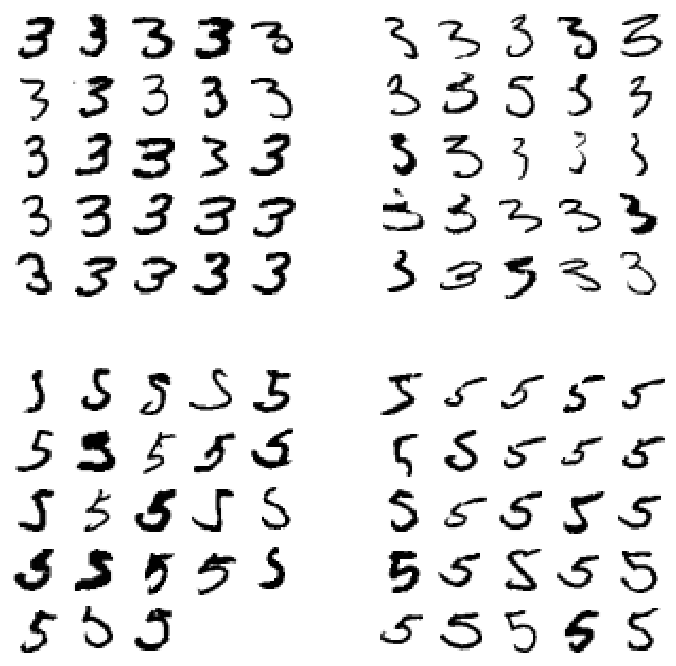

In [166]:
def plot_digits(instances, images_per_row=10, **options): 
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(12,12))
plt.subplot(221); plot_digits(x_aa[:25], images_per_row=5)

plt.subplot(222); plot_digits(x_ab[:25], images_per_row=5)

plt.subplot(223); plot_digits(x_ba[:25], images_per_row=5)

plt.subplot(224); plot_digits(x_bb[:25], images_per_row=5)
plt.axis('off')
plt.show()

## compare incorrect predictions for originals on the left with incorrect enhanced numbers on the right

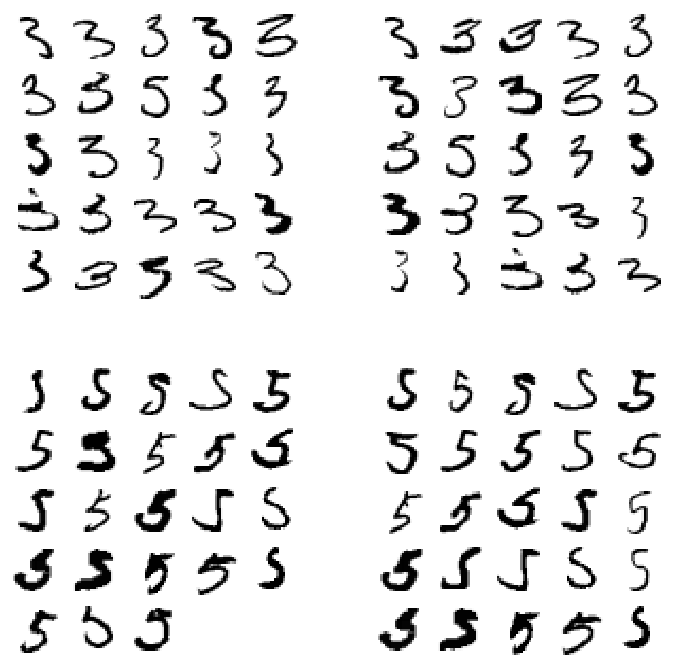

In [168]:
plt.figure(figsize=(12,12))
plt.subplot(221); plot_digits(x_ab[:25], images_per_row=5)

plt.subplot(222); plot_digits(x_ab_bw[:25], images_per_row=5)

plt.subplot(223); plot_digits(x_ba[:25], images_per_row=5)

plt.subplot(224); plot_digits(x_ba_bw[:25], images_per_row=5)
plt.axis('off')
plt.show()

In [200]:
y_scores = cross_val_predict(svm_clf, X_train, y_train, cv=3, method='decision_function')




ModuleNotFoundError: No module named 'sklear'

In [201]:
y_scores_bw = cross_val_predict(svm_clf_bw, X_train_bw, y_train, cv=3, method='decision_function')

In [226]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

len(y_train)

20000

In [202]:
from sklearn.metrics import roc_curve
fpr, tpr, treshold = roc_curve(y_train, y_scores)

ValueError: multiclass format is not supported